In [3]:
# imports
import panel as pn
import dash
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv, find_dotenv
import plotnine as p9
import warnings
from scipy import linalg, optimize
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
# Load .env enviroment variables (find_dotenv is required on my computer)
load_dotenv(find_dotenv('api_keys.env'))
map_box_api = os.getenv("MAPBOX_API_KEY")

In [5]:
# Create path and dataframe
cocoa_production_path = Path('/Users', 'tylerhubbard', 'umnfintech', 'project1_group3', 'Resources', 'cocoa-bean-production.csv')
production_df = pd.read_csv(cocoa_production_path, infer_datetime_format=True, parse_dates=True)
production_df = production_df.set_index(['Entity', 'Year'])
production_df = production_df.drop(columns=('Code'))
production_df

Crops (tonnes)
Entity        Year                 
Cameroon      2010           264077
              2011           240000
              2012           268941
              2013           275000
              2014           271297
              2015           274939
              2016           293169
              2017           300511
              2018           307867
Cote d'Ivoire 2010          1301347
              2011          1511255
              2012          1485882
              2013          1448992
              2014          1617841
              2015          1796000
              2016          1634000
              2017          2034000
              2018          1963949
Ecuador       2010           132099
              2011           224163
              2012           133323
              2013           128446
              2014           156216
              2015           180192
              2016           177551
              2017           205955
              2018           235182
Ghana         2010           632037
              2011           700020
              2012           879348
              2013           835466
              2014           858720
              2015           858720
              2016           858720
              2017           893598
              2018           947632
Nigeria       2010           399200
              2011           391000
              2012           383000
              2013           367000
              2014           329870
              2015           302066
              2016           298029
              2017           324391
              2018           332927

<AxesSubplot:title={'center':'Crop Production Data by Country and Year'}, xlabel='Entity,Year', ylabel='Production in Tonnes by Million'>

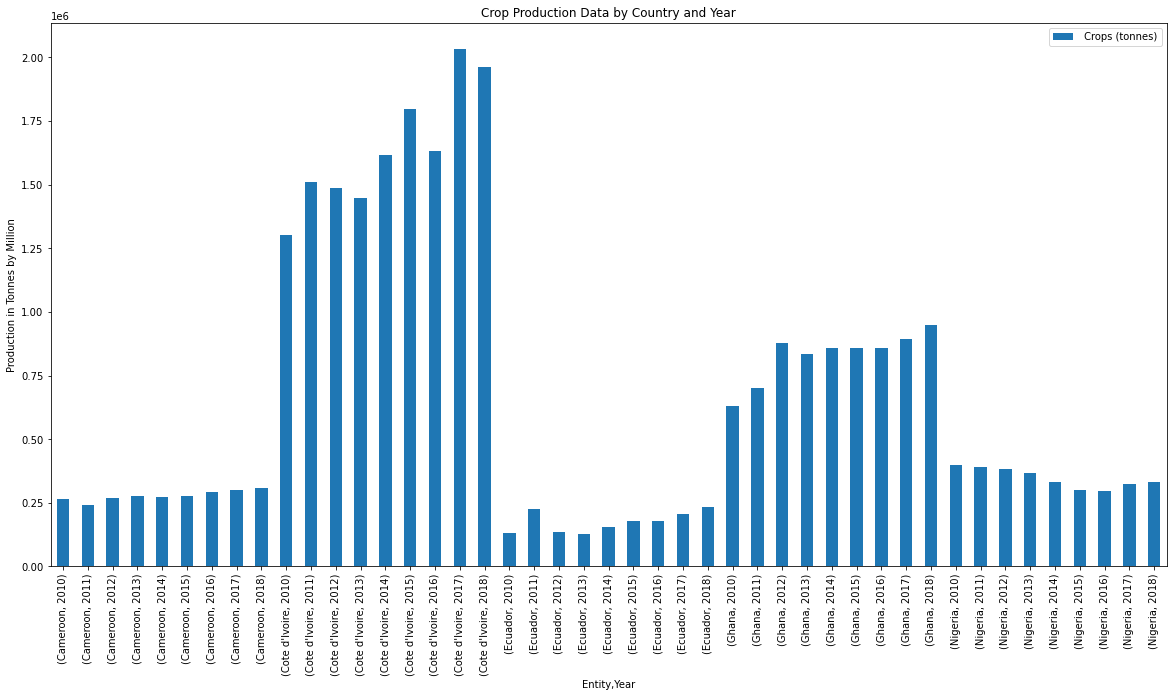

In [8]:
# Plot whole dataframe
production_df_plot = production_df.plot(kind='bar', figsize=(20,10), title='Crop Production Data by Country and Year',
                  ylabel='Production in Tonnes by Million')
production_df_plot

In [10]:
# Create second dataframe with only Year as the index
production_df2 = pd.read_csv(cocoa_production_path, infer_datetime_format=True, parse_dates=True)
production_df2 = production_df2.set_index(['Year'])
production_df2 = production_df2.drop(columns=('Code'))

# Determine mean
production_mean = production_df2.groupby(by=['Year'], dropna=False).mean()
production_mean

,Crops (tonnes)
Year,
2010,545752.0
2011,613287.6
2012,630098.8
2013,610980.8
2014,646788.8
2015,682383.4
2016,652293.8
2017,751691.0
2018,757511.4


<AxesSubplot:title={'center':'Average Values of Production by Year'}, xlabel='Year', ylabel='Production in Tonnes'>

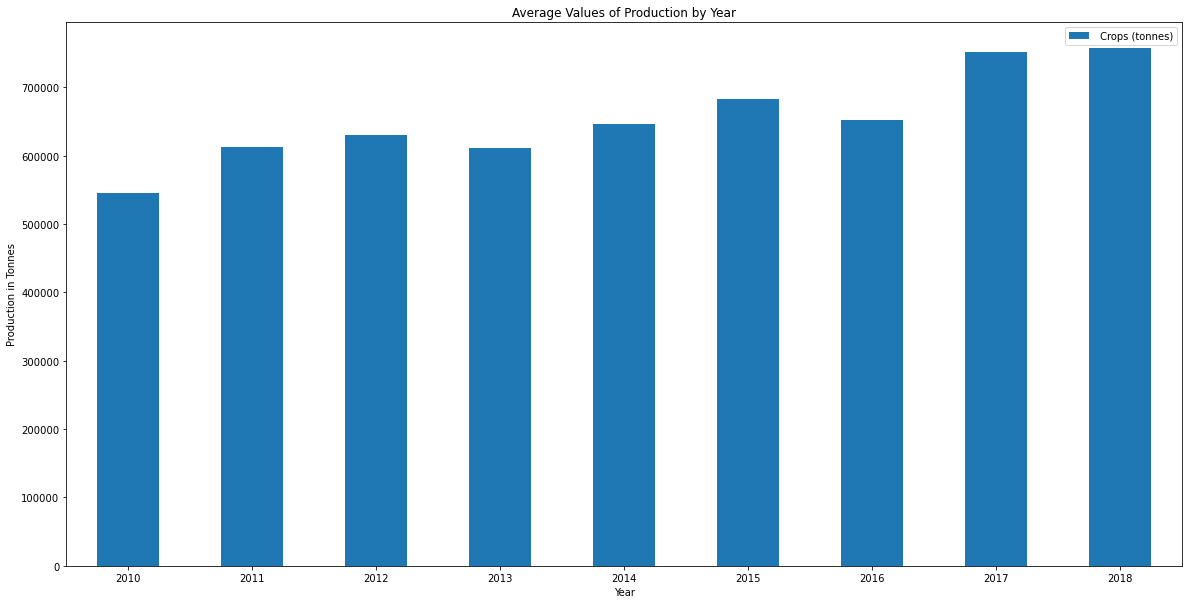

In [11]:
# Plot production mean
production_mean_plot = production_mean.plot(kind='bar', figsize=(20,10), title='Average Values of Production by Year',
                                           rot=0, ylabel='Production in Tonnes')
production_mean_plot

In [12]:
# Determine min, max, std
production_min = production_df2.groupby(by=['Year']).min()
production_min = production_min.drop(columns=('Entity'))
production_max = production_df2.groupby(by=['Year']).max()
production_max = production_max.drop(columns=('Entity'))
production_std = production_df2.groupby(by=['Year']).std()

In [13]:
# Check min values
production_min

,Crops (tonnes)
Year,
2010,132099
2011,224163
2012,133323
2013,128446
2014,156216
2015,180192
2016,177551
2017,205955
2018,235182


<AxesSubplot:title={'center':'Minimum Values of Production by Year'}, xlabel='Year', ylabel='Production in Tonnes'>

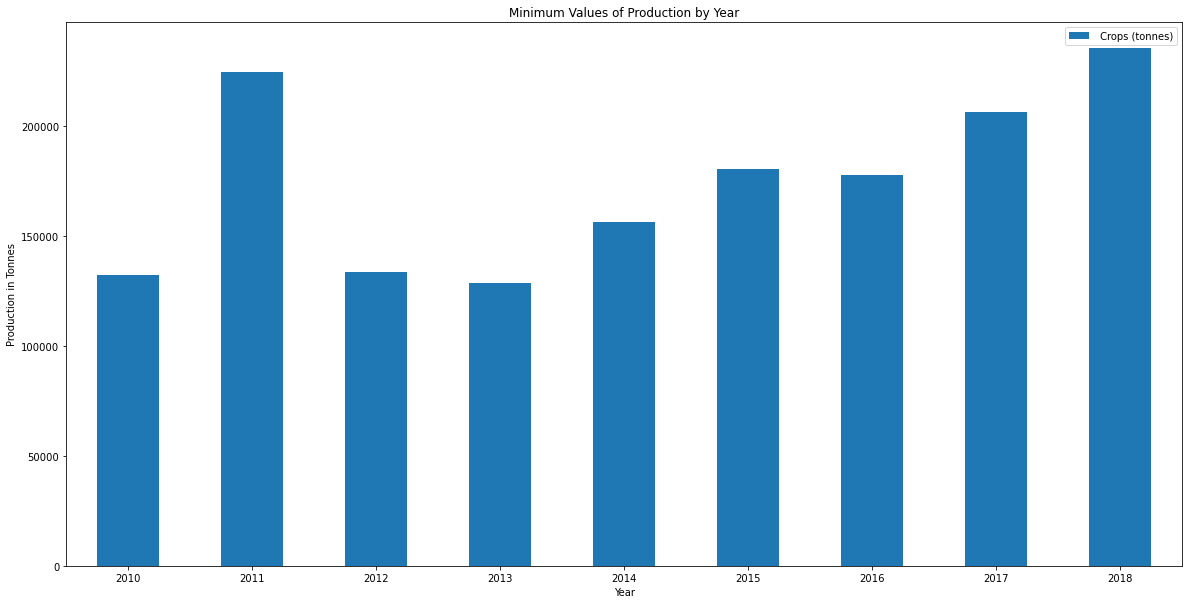

In [14]:
# Plot min values
production_min_plot = production_min.plot(kind='bar', figsize=(20,10), 
                                          title='Minimum Values of Production by Year',
                                         rot=0, ylabel='Production in Tonnes')
production_min_plot

In [15]:
# Check max values
production_max

,Crops (tonnes)
Year,
2010,1301347
2011,1511255
2012,1485882
2013,1448992
2014,1617841
2015,1796000
2016,1634000
2017,2034000
2018,1963949


<AxesSubplot:title={'center':'Max Values of Production by Year'}, xlabel='Year', ylabel='Production in Tonnes'>

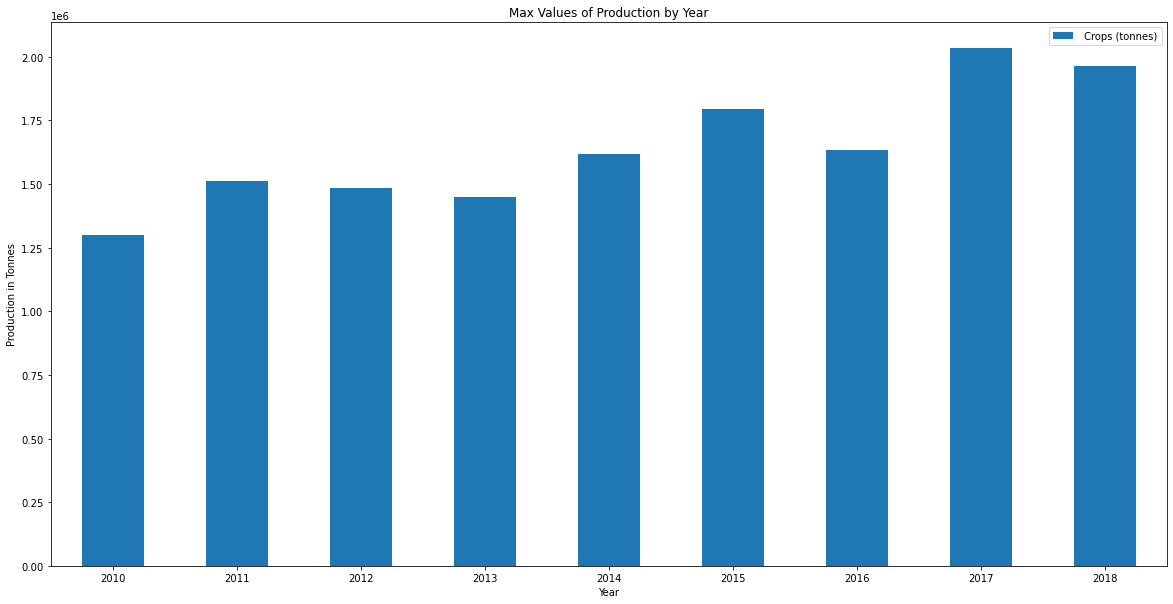

In [16]:
# Plot max values
production_max_plot = production_max.plot(kind='bar', figsize=(20,10), 
                                         title='Max Values of Production by Year',
                                         rot=0, ylabel='Production in Tonnes')
production_max_plot

In [17]:
# Check std values, ensure float is set to two decimals
pd.options.display.float_format = "{:,.2f}".format
production_std

,Crops (tonnes)
Year,
2010,"461,057.48"
2011,"537,131.58"
2012,"555,150.66"
2013,"538,030.19"
2014,"606,207.58"
2015,"677,141.97"
2016,"609,551.83"
2017,"766,229.47"
2018,"732,618.17"


<AxesSubplot:title={'center':'Standard Deviation in Production by Year'}, xlabel='Year', ylabel='Production in Tonnes'>

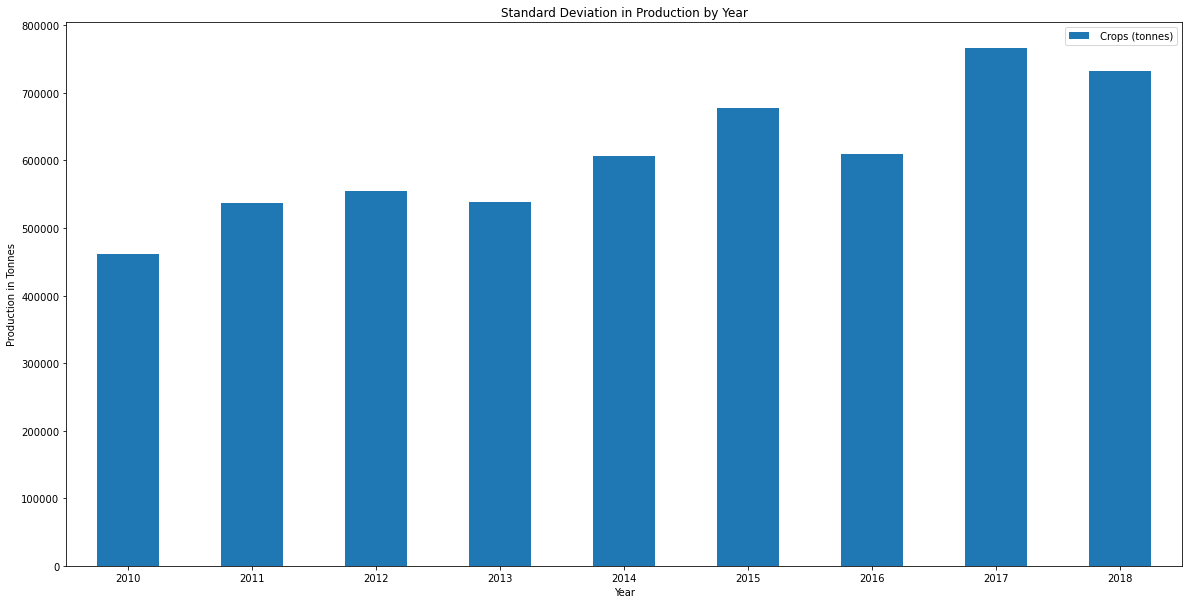

In [18]:
# Plot std values
production_std_plot = production_std.plot(kind='bar', figsize=(20,10),
                                          title='Standard Deviation in Production by Year',
                                          rot=0, ylabel='Production in Tonnes')
production_std_plot